## Support Vector Regressor Implementation

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [10]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [11]:
X

array([[ 2.29660012,  1.26881552],
       [-0.29766358,  0.03947504],
       [-1.36749808,  0.78892311],
       ...,
       [-0.62723485,  0.24882497],
       [-0.57831656,  0.63018773],
       [-1.5475387 ,  1.2096298 ]])

In [12]:
y

array([ 7.41172097e+01, -5.51920115e+00, -2.20886004e+01, -5.16464050e+00,
        1.78199419e+01,  5.91227162e+01,  5.97470776e+00, -3.10774904e+01,
        3.69670533e+01,  4.81280563e+00, -7.70802049e-02, -3.78418453e+01,
        4.30992193e+00, -7.38366116e+01,  4.05202229e+01, -1.87374497e+01,
        1.09783649e+01, -5.16329675e+01, -1.50383168e+01,  6.04199482e+00,
        1.25222313e+01,  6.79647900e+00,  7.36172059e+00,  2.39010819e+01,
       -2.61039572e+01,  4.67826720e-01, -1.04221186e+00, -1.08854453e+01,
        2.70647487e+01, -3.11739969e+01, -2.68061453e+01, -1.00391735e+01,
        5.11183673e+01, -2.02241027e+01, -2.75316168e+01, -2.86094776e+01,
       -5.96030291e+00, -4.63694094e+01, -3.77215053e+01, -2.86854751e+00,
       -5.40922538e+00, -2.20863145e+01, -1.77961188e+01,  1.15644999e+01,
        4.80636010e+01,  3.49446400e+01, -1.09977848e-01, -3.94268869e+01,
        1.67755178e+01, -7.25388720e+00, -7.76112108e-01,  3.54514813e+01,
       -2.15181867e+00, -

In [13]:
pd.DataFrame(X)[0]

0      2.296600
1     -0.297664
2     -1.367498
3     -0.274386
4     -0.096317
         ...   
995   -0.378522
996    0.441638
997   -0.627235
998   -0.578317
999   -1.547539
Name: 0, Length: 1000, dtype: float64

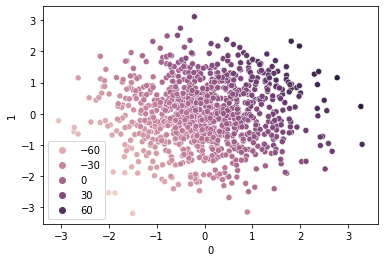

In [16]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [18]:
from sklearn.svm import SVR

In [19]:
svr=SVR(kernel='linear')

In [20]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [21]:
svr.coef_

array([[24.02460045, 14.34388868]])

In [22]:
## Prediction
y_pred=svr.predict(X_test)

In [23]:
y_pred

array([ 18.07088166,  36.89763303,   8.27257796,  23.6360926 ,
         9.2595733 ,  35.11315452,   7.76535761,   9.86632271,
       -37.05139728,  26.13690575,  -1.20619051,  18.59884337,
       -18.38401016,  29.79805742, -23.45296939,  -6.85868104,
        17.55906336,   2.05969381,  56.24459339,  45.23293438,
       -13.3320501 , -36.3630028 , -44.64848883,  48.280164  ,
         0.48556019,  11.35242074,  34.68246276, -26.91831271,
       -14.36512705, -20.60905941,   7.18532286, -56.57699079,
        30.64266347, -35.3267338 , -32.42323291,  -7.80924437,
        25.90646674,  -7.44183749,  29.04891322, -17.084538  ,
       -52.19282347,  -1.62270562,  -3.57598229, -11.36248667,
        45.1047366 ,  39.20778239,  32.2283212 , -29.09229369,
       -39.1529812 ,   9.52824841, -14.825618  , -22.80968297,
        43.00082426, -36.5417444 ,  15.75802017,  -8.65123329,
        12.36454362,  17.16376588,   8.42582315,   4.14408353,
       -17.70636002, -24.10024852,  32.22941076, -37.85

In [24]:
from sklearn.metrics import r2_score

In [25]:
print(r2_score(y_test,y_pred))

0.9887695762160112


## Hyperparametere Tuning With SVR

In [26]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [27]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [28]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.982 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.979 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.982 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=1, e

[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.989 total

[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.989 total time=   0.0s

[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.984 total time=   0.3s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.989 total time=   0.3s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.987 total time=   0.3s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.988 total time=   0.5s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.987 total time=   0.4s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.984 total time=   0.4s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.989 total time=   0.3s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.987 total time=   0.3s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [32]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9886005961564003
